In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from lightgbm import LGBMClassifier
import joblib

# 2. Load and Clean the Data
df = pd.read_csv(r"D:\adult 3.csv")
df.replace(' ?', np.nan, inplace=True)
df.dropna(inplace=True)

# 3. Encode Categorical Variables
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 4. Split Data into Features and Target
X = df.drop("income", axis=1)
y = df["income"]

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Initialize and Train LightGBM Model
model = LGBMClassifier()
model.fit(X_train, y_train)

# 7. Predict and Evaluate
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

# 8. Display Evaluation Metrics
print("LightGBM Model Performance Summary:\n")
print(f"Accuracy       : {report['accuracy']:.2f}")
print(f"F1 Score (>50K): {report['1']['f1-score']:.2f}")
print(f"F1 Score (<=50K): {report['0']['f1-score']:.2f}")

# 9. Save the Trained Model
joblib.dump(model, "model_lightgbm_v2.pkl")

# 10. Conclusion
# The LightGBM model performs very well for binary income classification.
# It's efficient, accurate, and ideal for deployment in a real-world app.


[LightGBM] [Info] Number of positive: 9397, number of negative: 29676
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 717
[LightGBM] [Info] Number of data points in the train set: 39073, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240499 -> initscore=-1.149948
[LightGBM] [Info] Start training from score -1.149948
LightGBM Model Performance Summary:

Accuracy       : 0.88
F1 Score (>50K): 0.72
F1 Score (<=50K): 0.92


['model_lightgbm_v2.pkl']

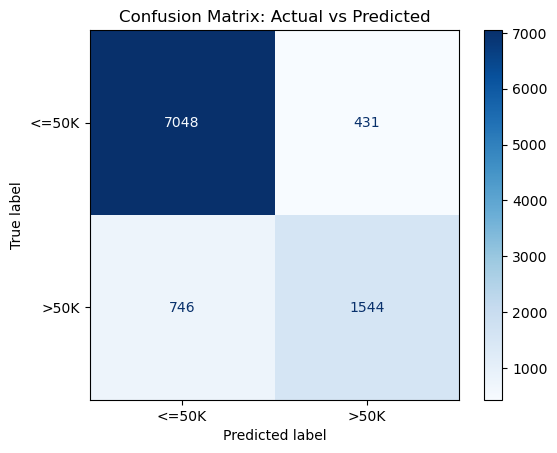

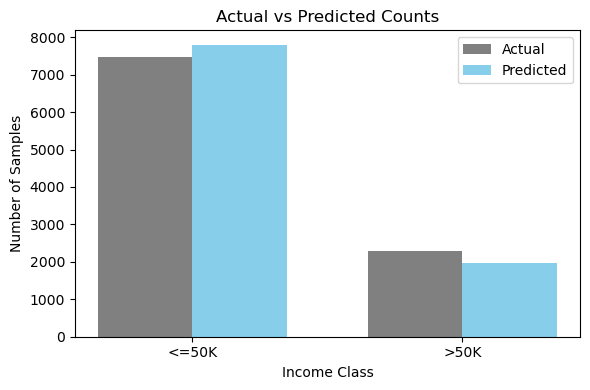

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.90      0.94      0.92      7479
        >50K       0.78      0.67      0.72      2290

    accuracy                           0.88      9769
   macro avg       0.84      0.81      0.82      9769
weighted avg       0.88      0.88      0.88      9769



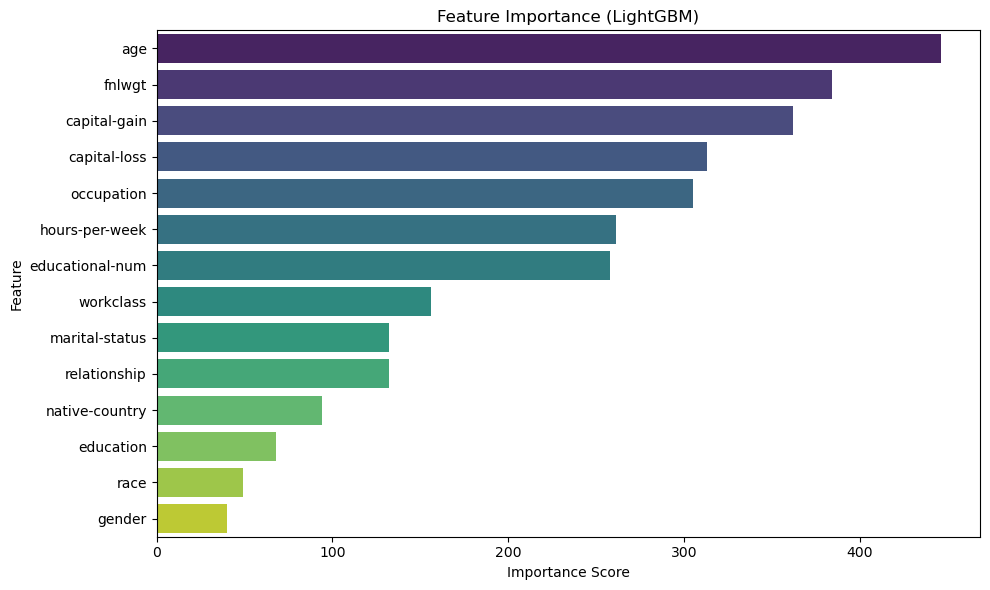

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import joblib

# Assuming model and X_test, y_test are already available
model = joblib.load("model_lightgbm.pkl")
y_pred = model.predict(X_test)

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["<=50K", ">50K"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix: Actual vs Predicted")
plt.show()

# 2. Actual vs Predicted Bar Plot
actual_counts = pd.Series(y_test).value_counts().sort_index()
predicted_counts = pd.Series(y_pred).value_counts().sort_index()
labels = ["<=50K", ">50K"]
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(6, 4))
plt.bar(x - width/2, actual_counts, width, label="Actual", color="gray")
plt.bar(x + width/2, predicted_counts, width, label="Predicted", color="skyblue")
plt.xticks(x, labels)
plt.title("Actual vs Predicted Counts")
plt.xlabel("Income Class")
plt.ylabel("Number of Samples")
plt.legend()
plt.tight_layout()
plt.show()

# 3. Classification Report (printed)
report = classification_report(y_test, y_pred, target_names=["<=50K", ">50K"])
print("Classification Report:\n", report)

# 4. Feature Importance Bar Plot (fixed for warning)
feature_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=feature_df,
    x="Importance",
    y="Feature",
    palette="viridis",
    hue="Feature",
    dodge=False,
    legend=False
)
plt.title("Feature Importance (LightGBM)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
